# Sample from the distribution of syntactically valid mazes with cheese

In [1]:
%load_ext autoreload
import sys, os
COLAB = 'google.colab' in sys.modules 
if COLAB:
    %pip install git+https://github.com/UlisseMini/procgen-tools

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from procgen import ProcgenGym3Env
import torch
from IPython import display
from typing import Optional, Tuple

from procgen_tools.models import load_policy
from procgen_tools.metrics import decision_square
from procgen_tools import maze

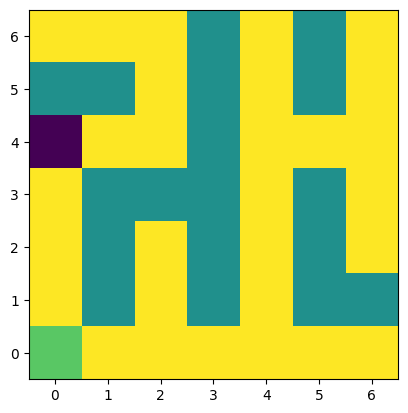

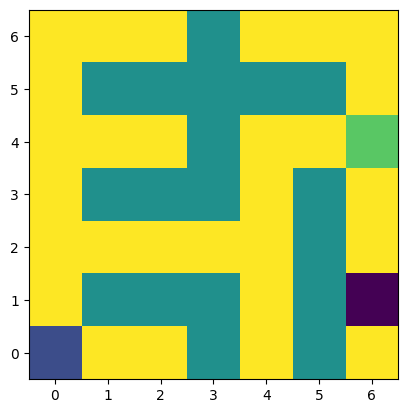

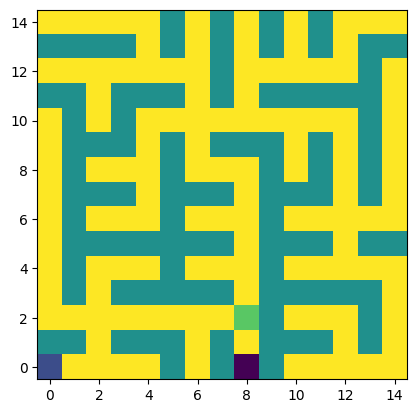

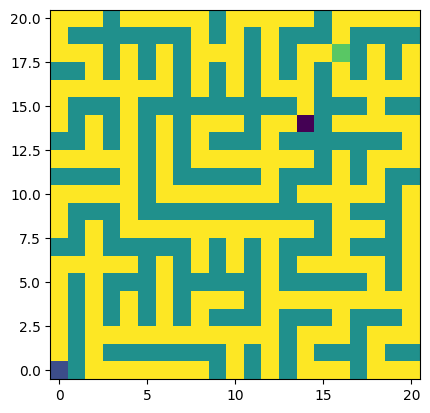

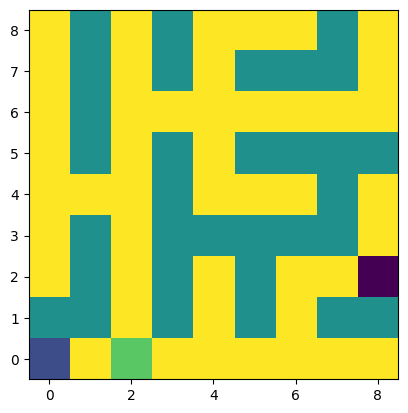

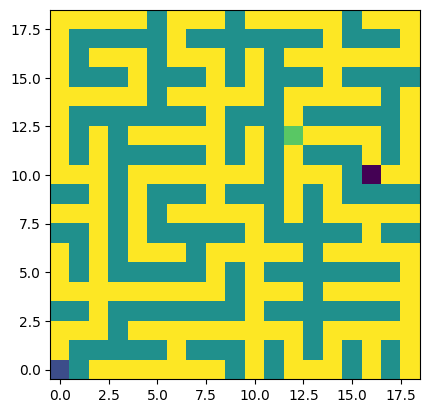

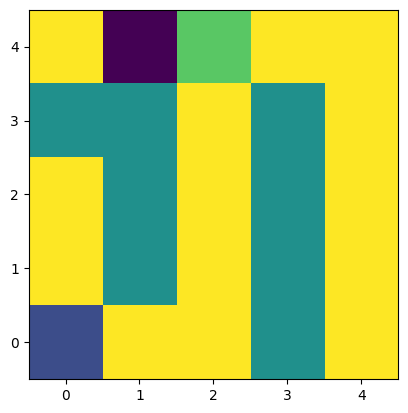

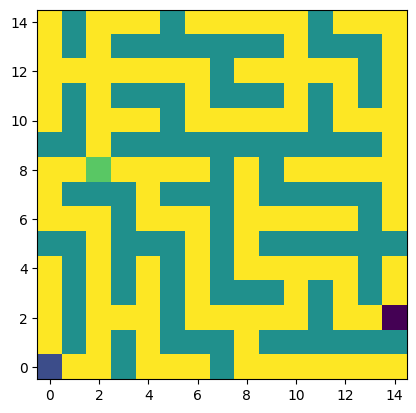

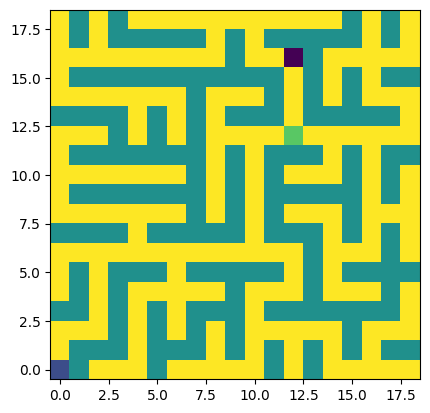

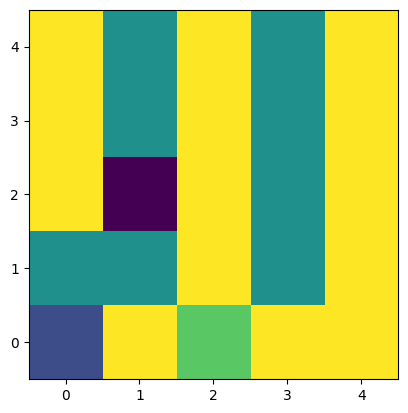

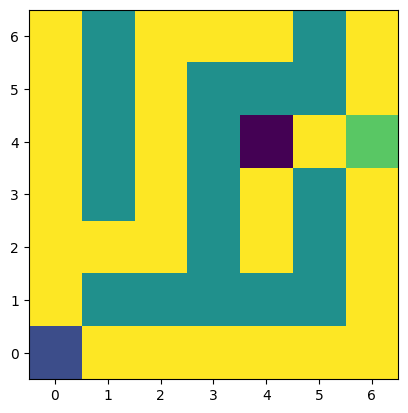

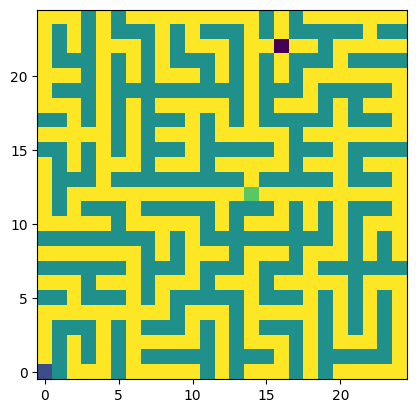

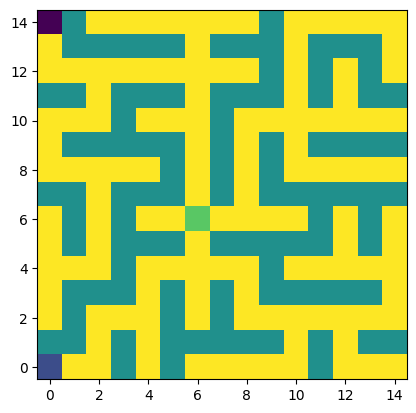

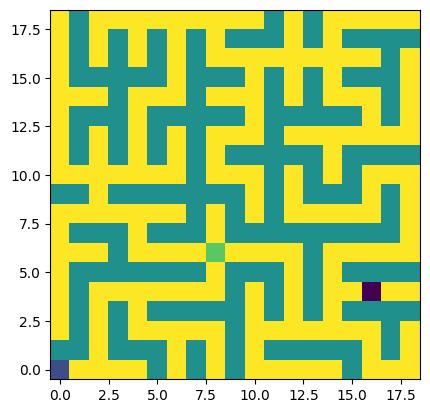

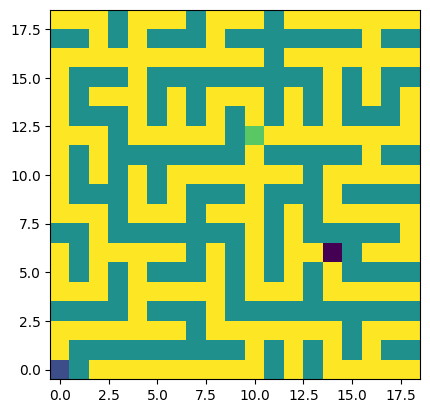

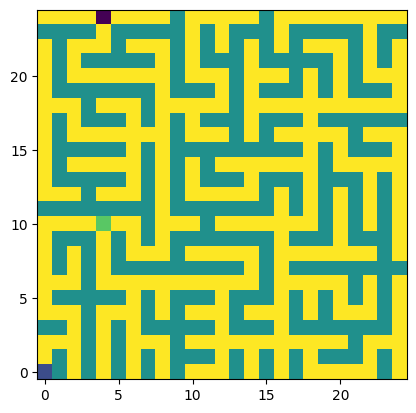

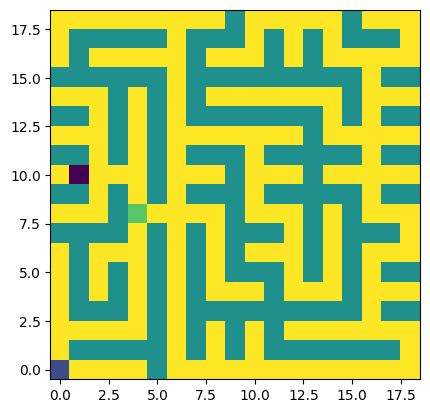

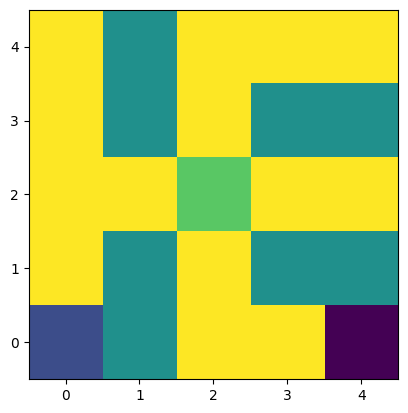

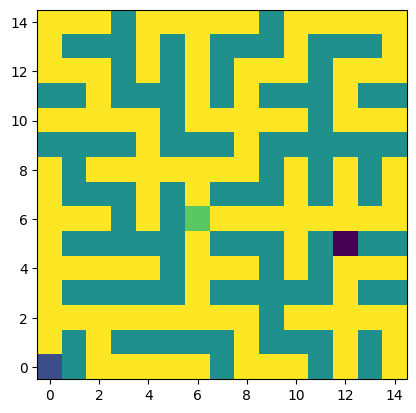

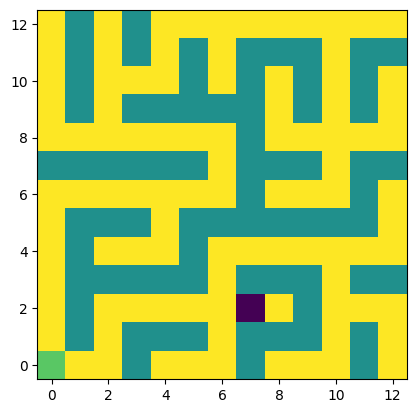

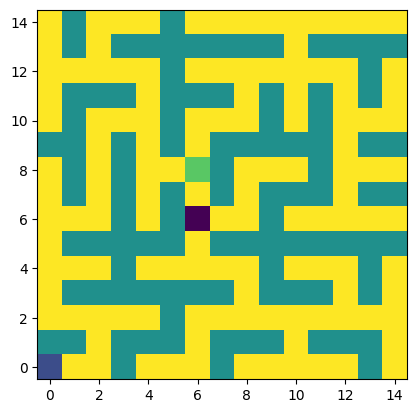

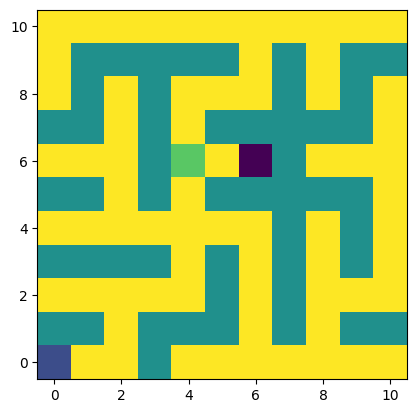

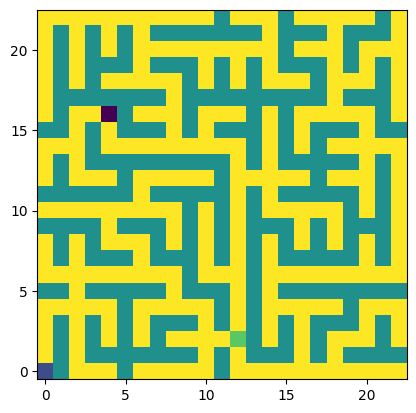

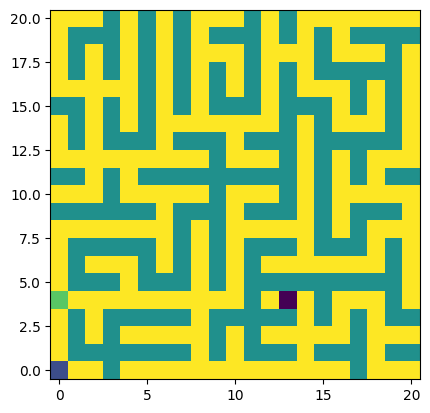

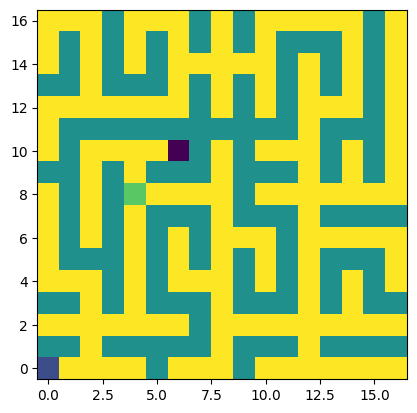

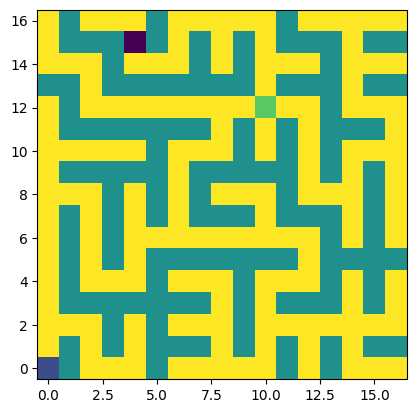

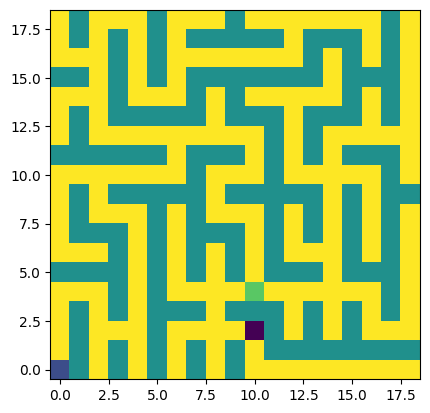

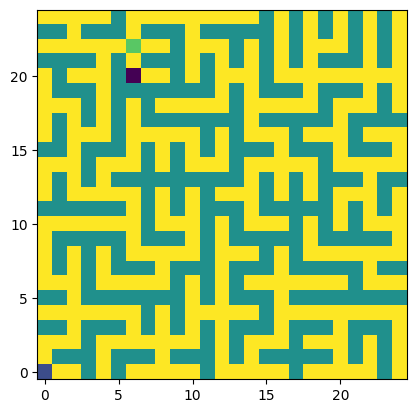

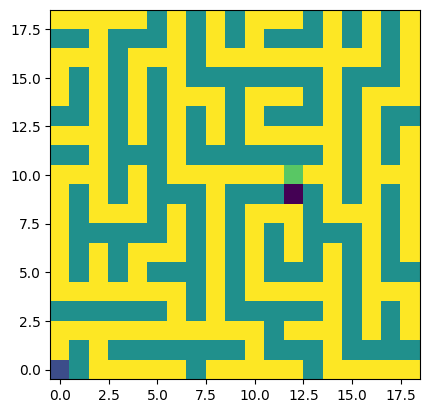

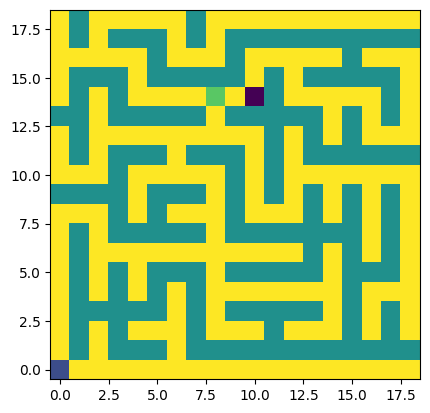

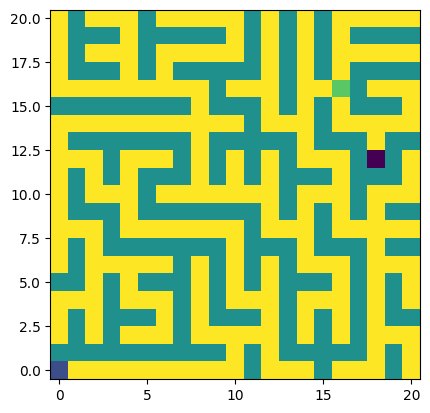

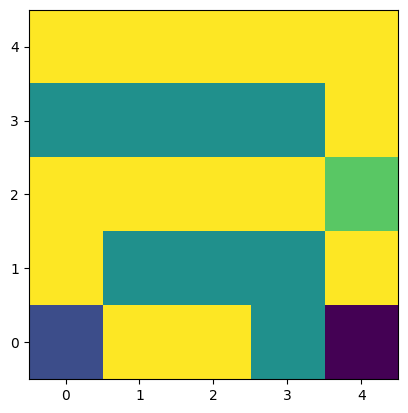

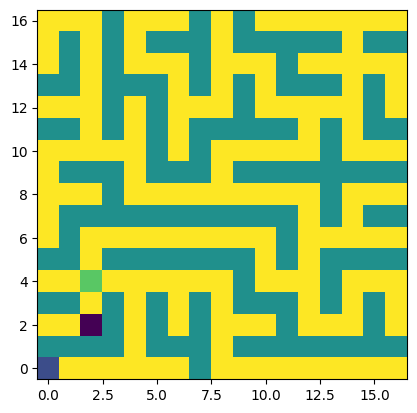

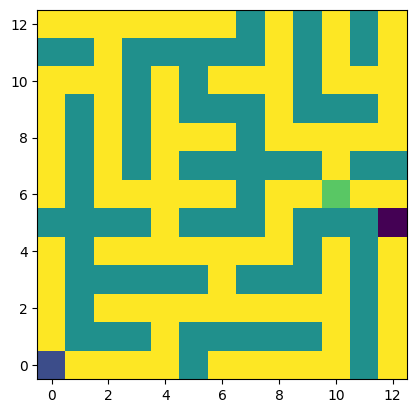

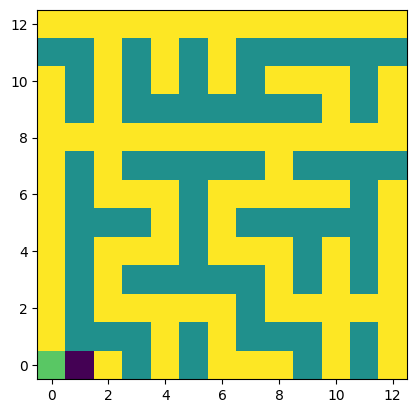

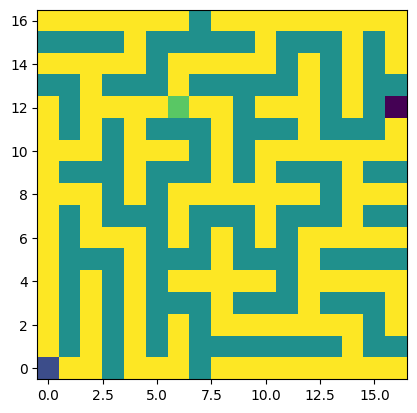

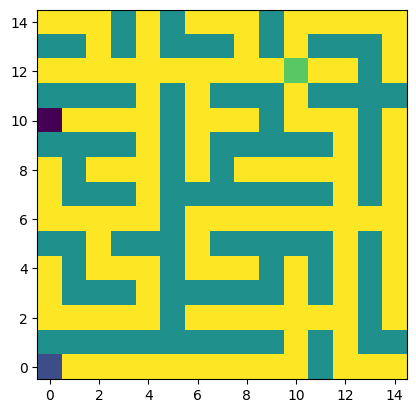

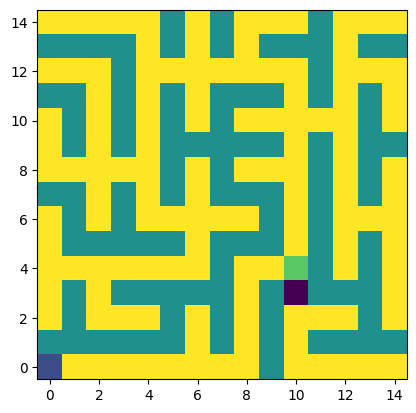

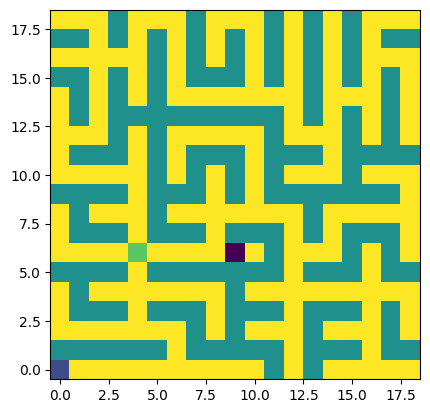

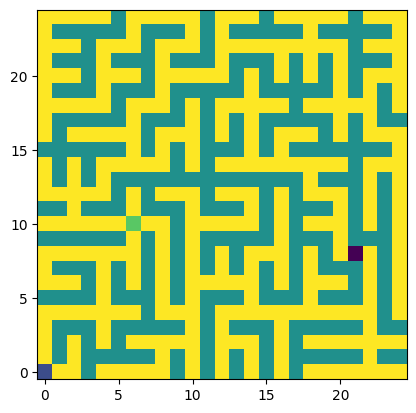

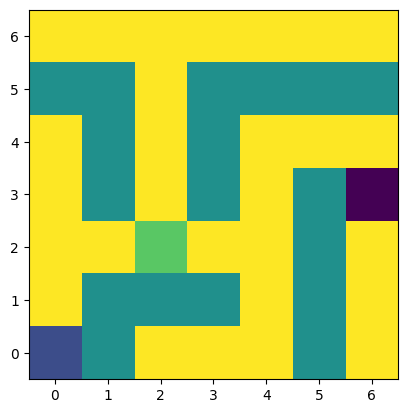

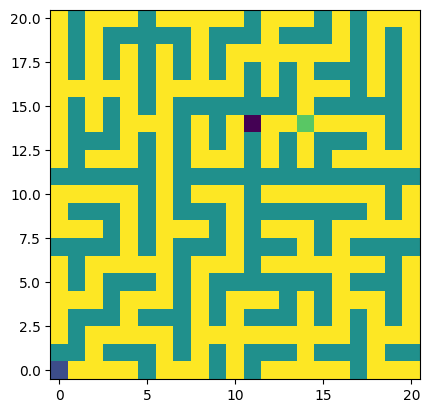

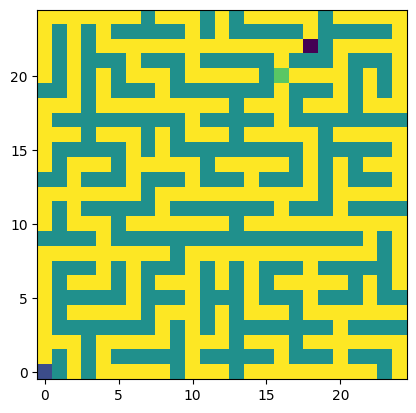

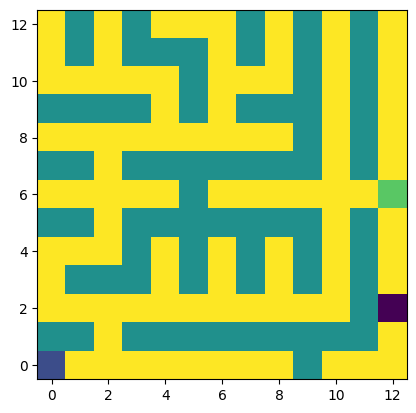

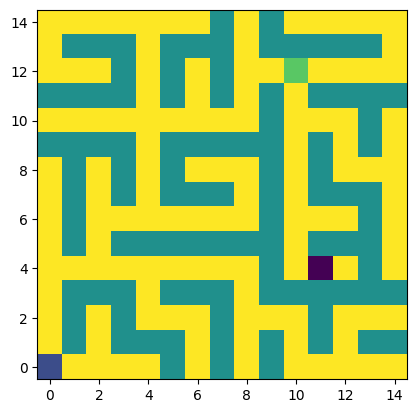

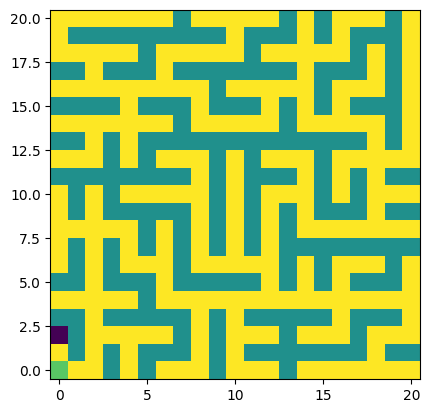

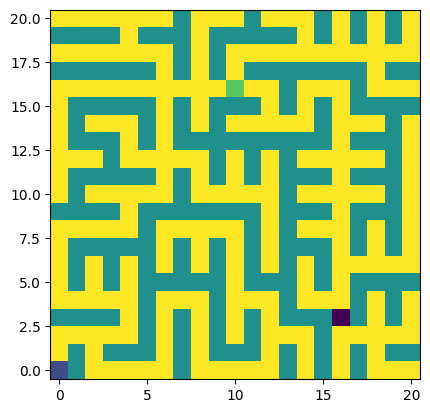

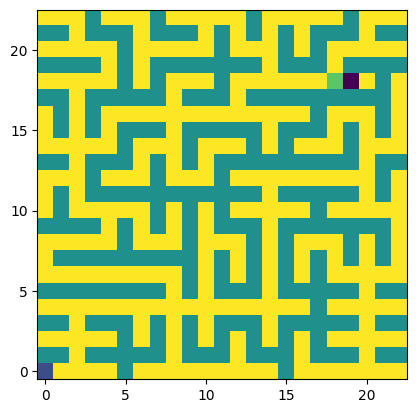

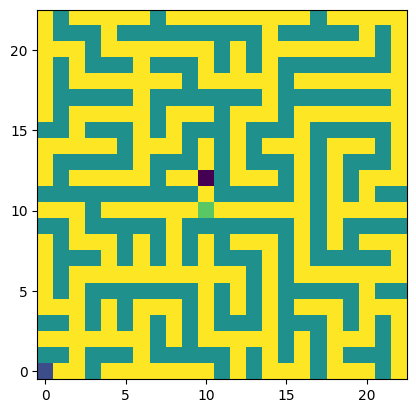

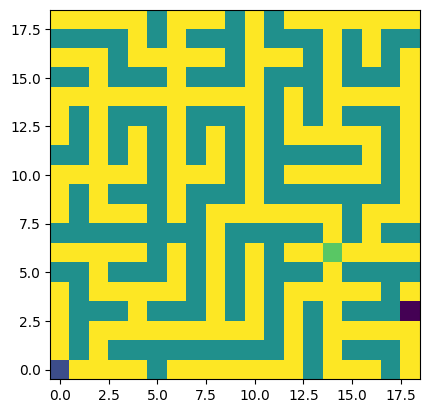

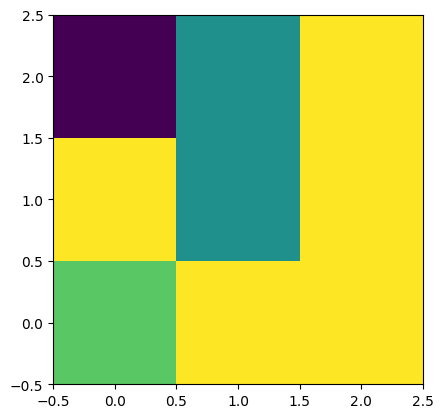

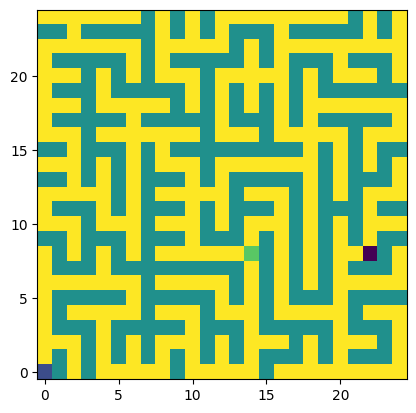

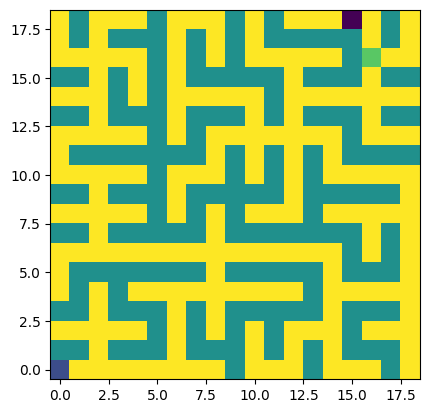

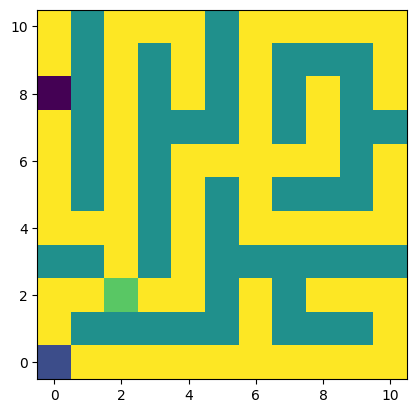

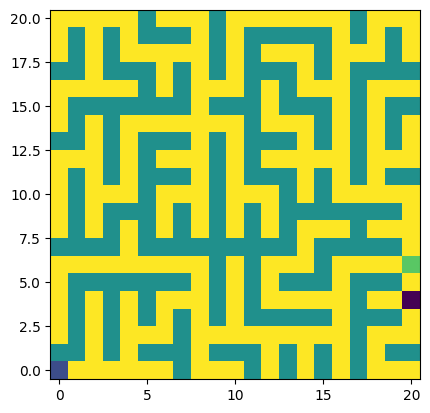

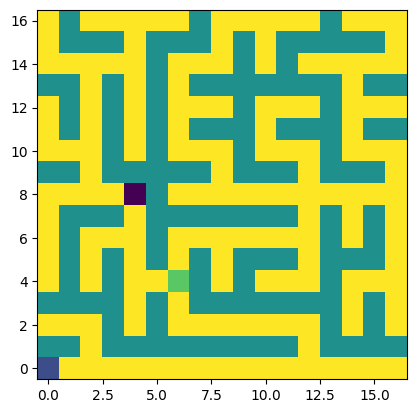

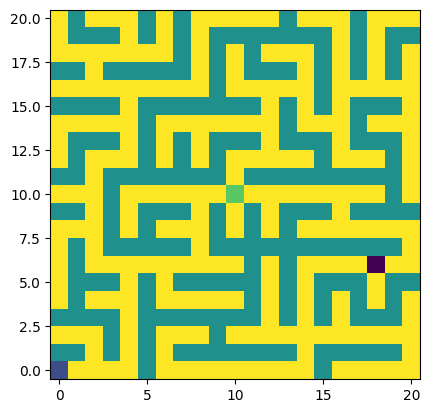

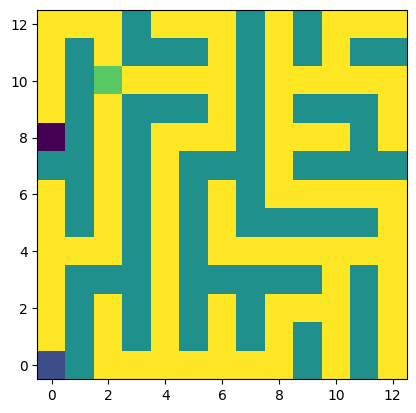

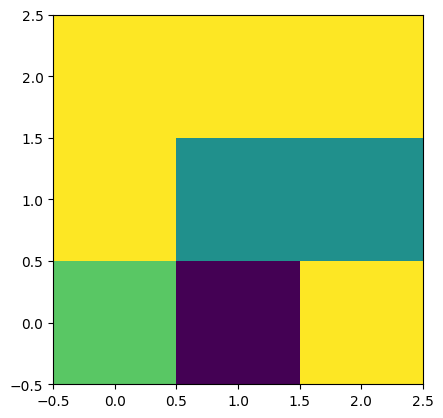

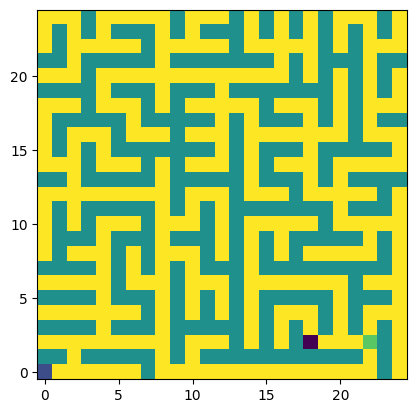

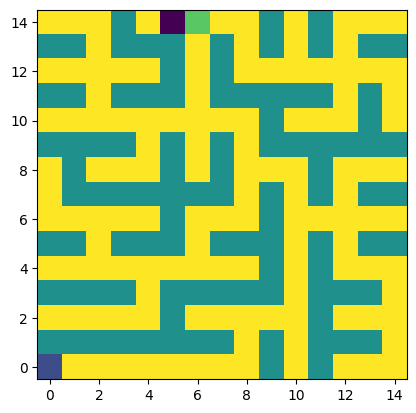

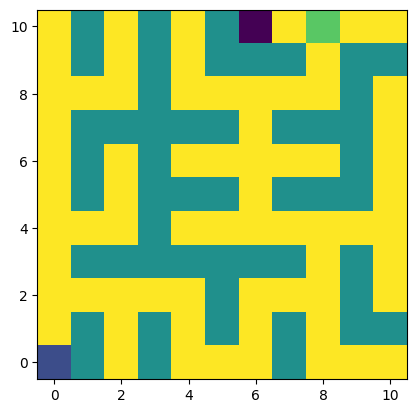

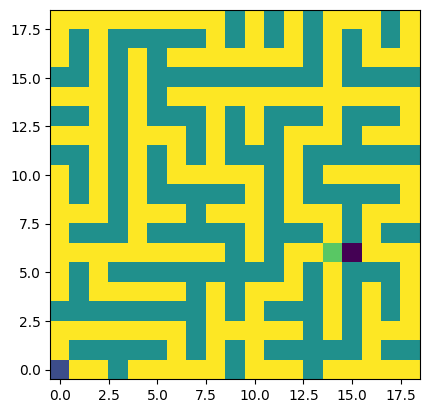

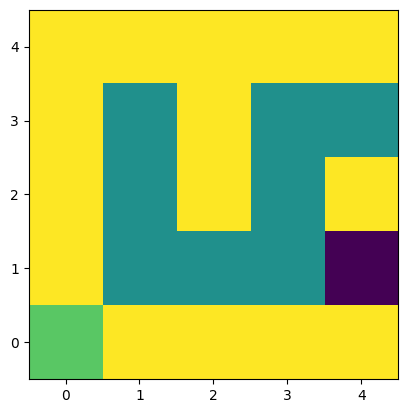

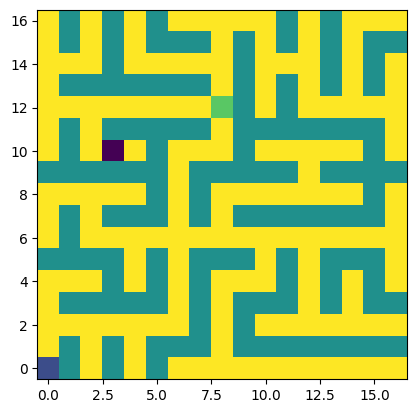

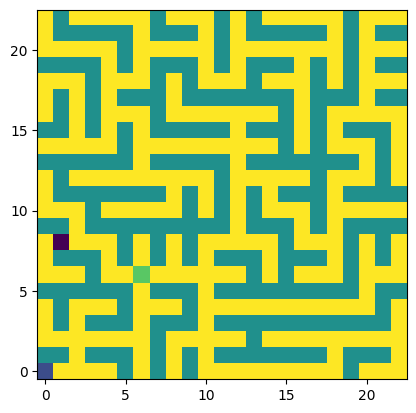

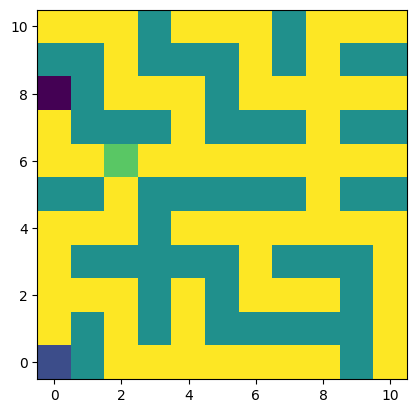

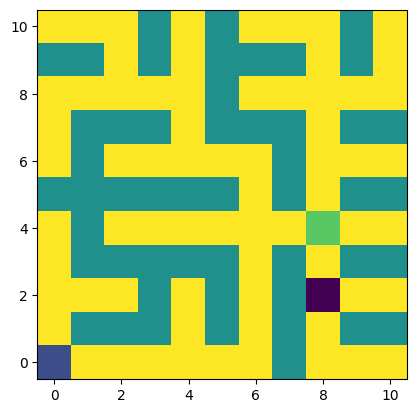

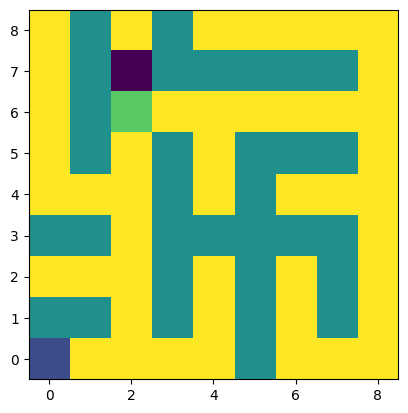

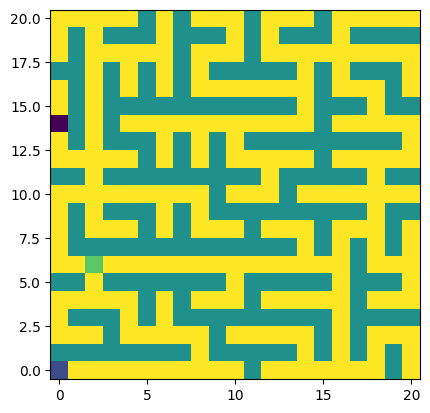

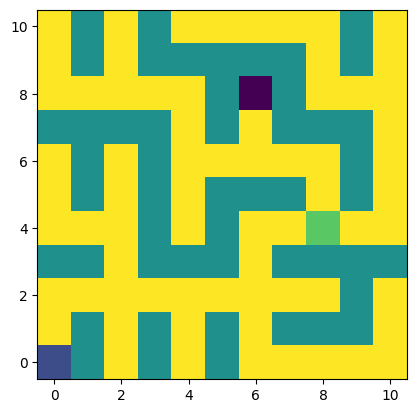

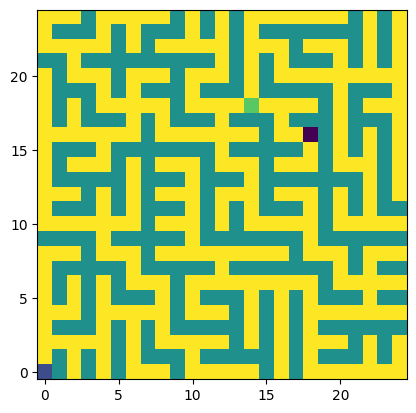

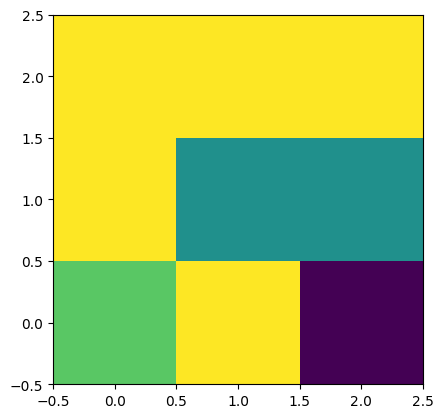

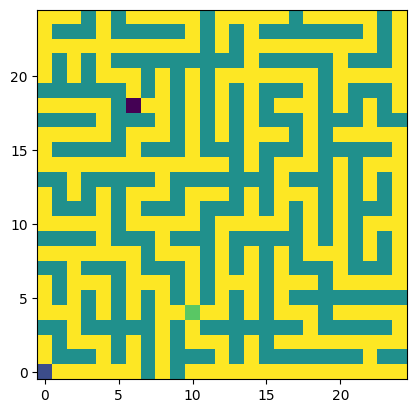

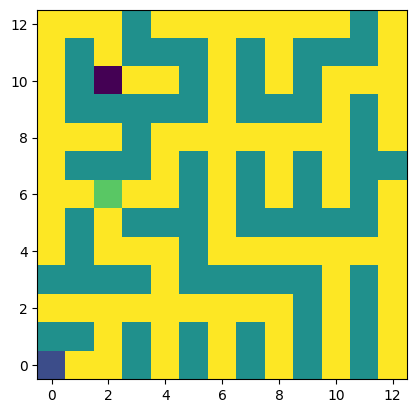

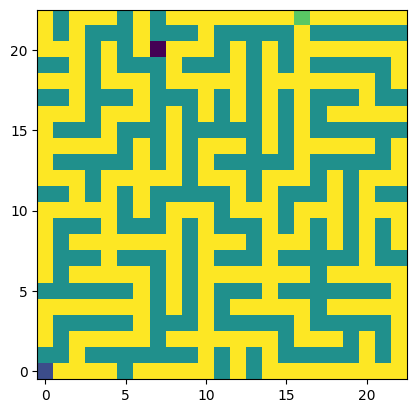

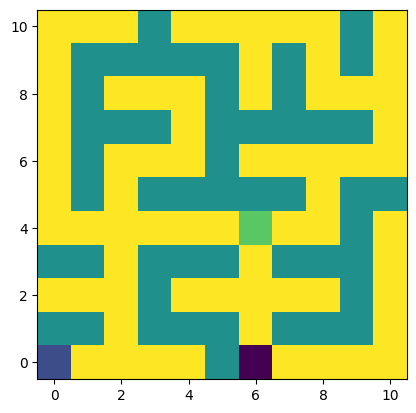

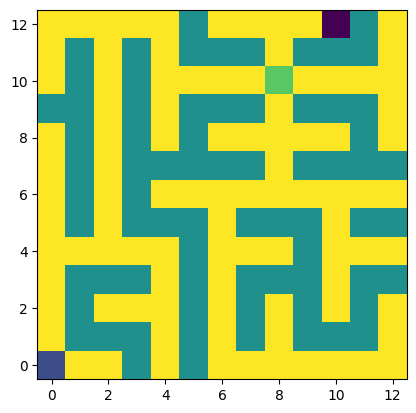

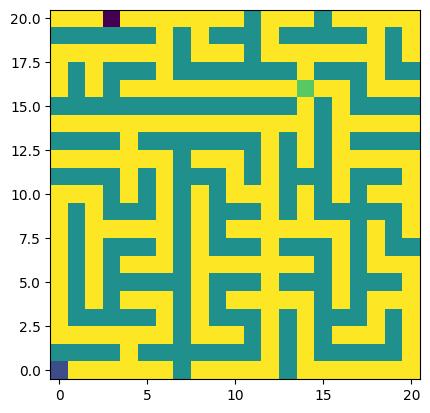

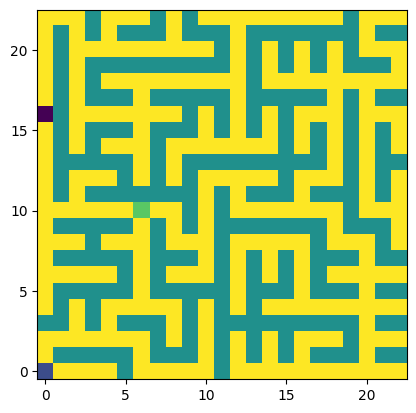

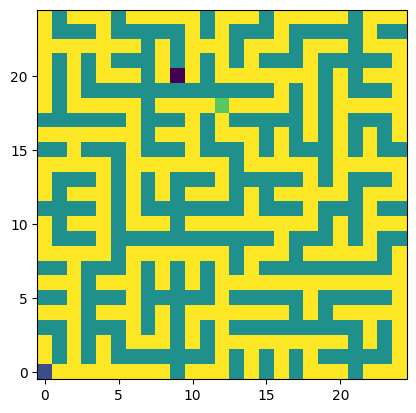

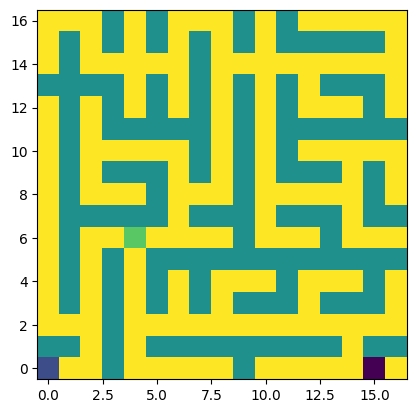

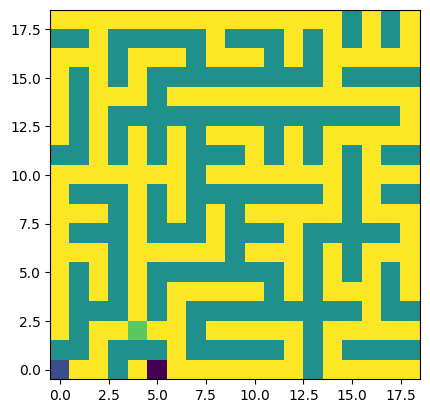

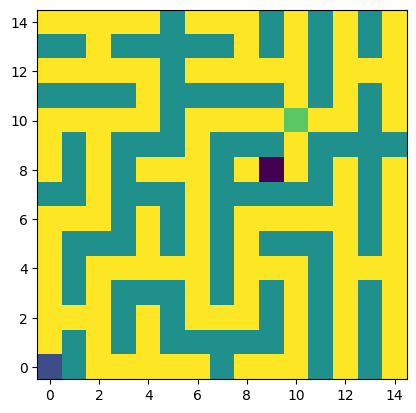

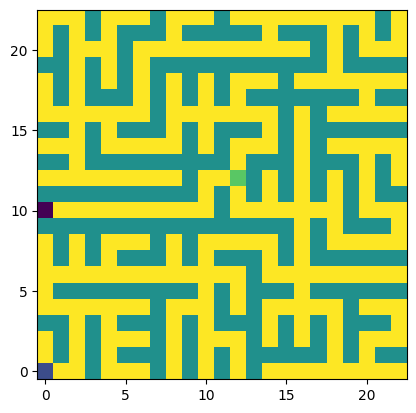

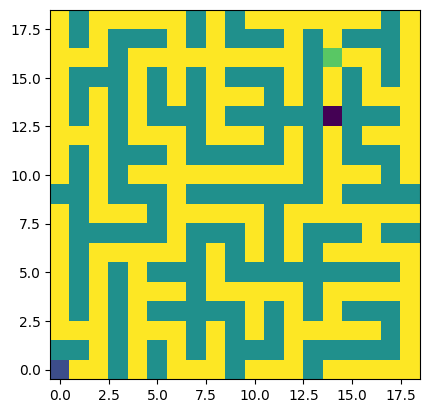

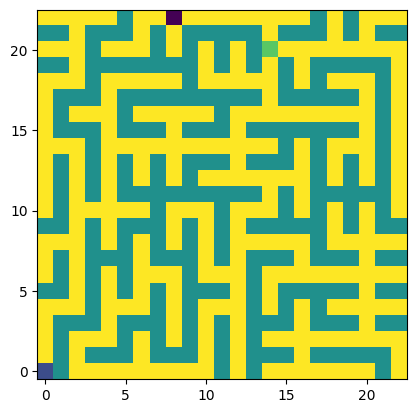

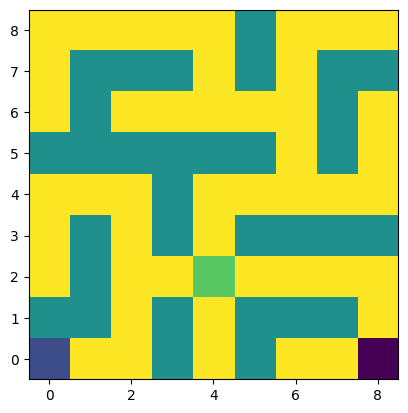

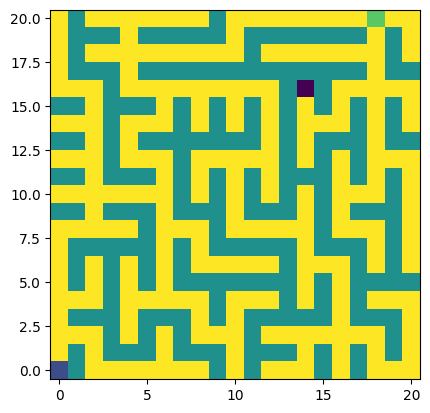

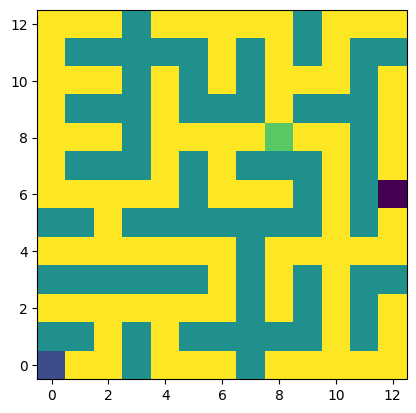

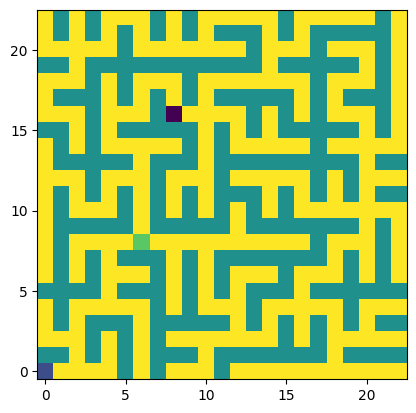

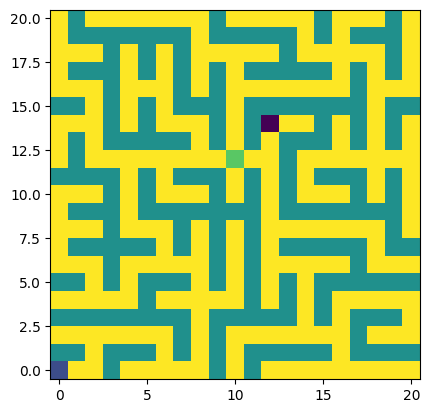

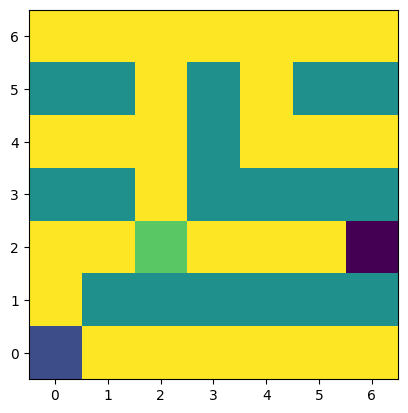

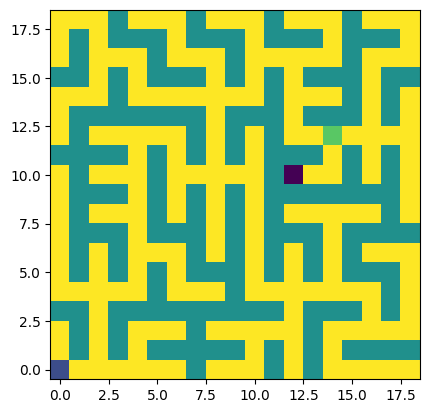

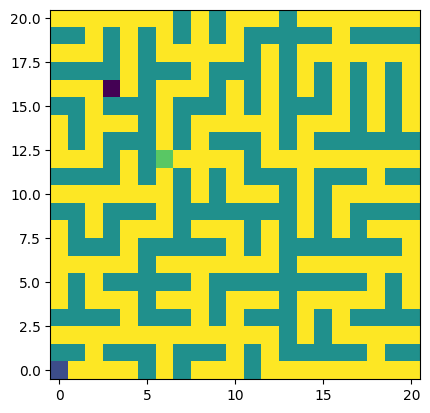

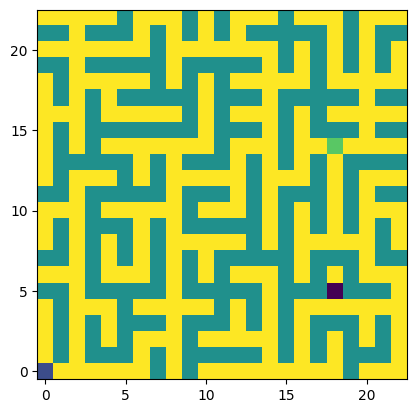

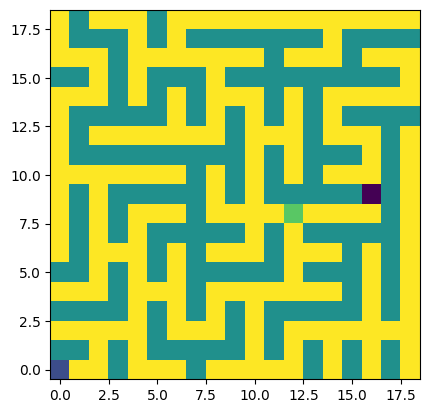

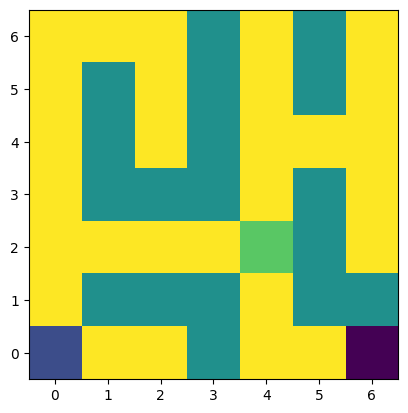

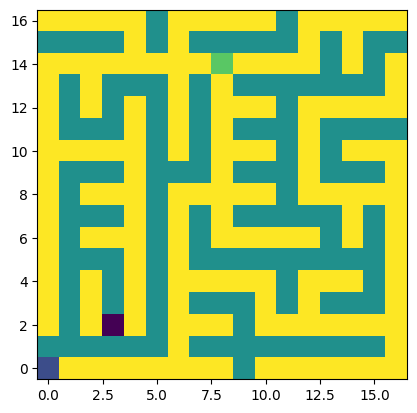

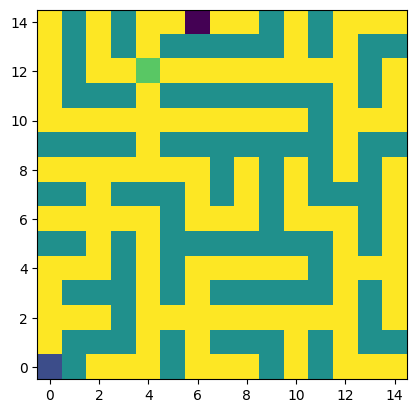

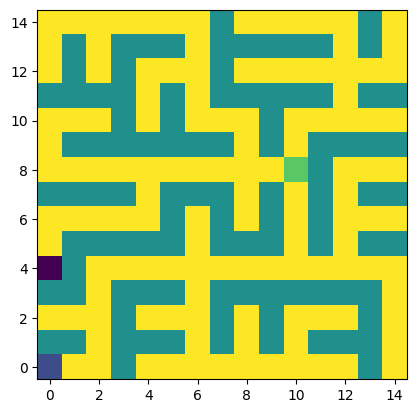

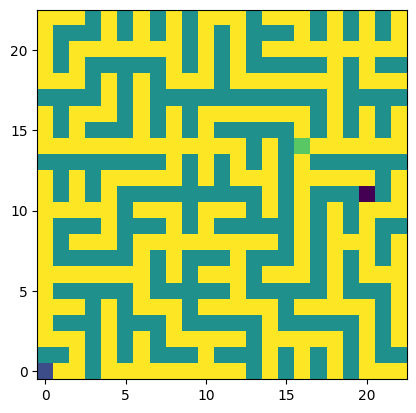

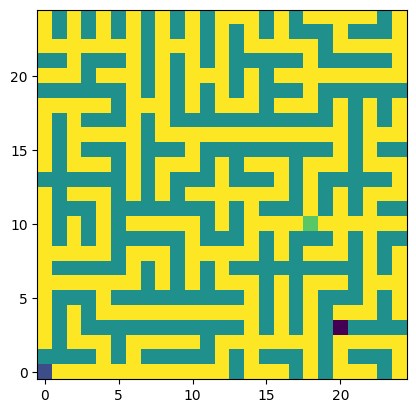

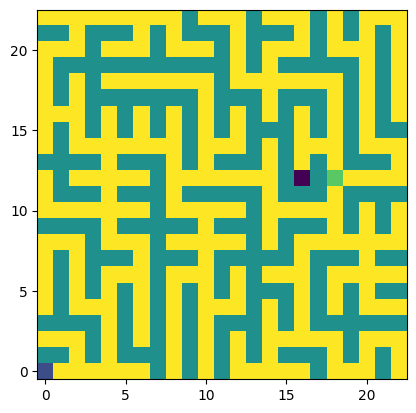

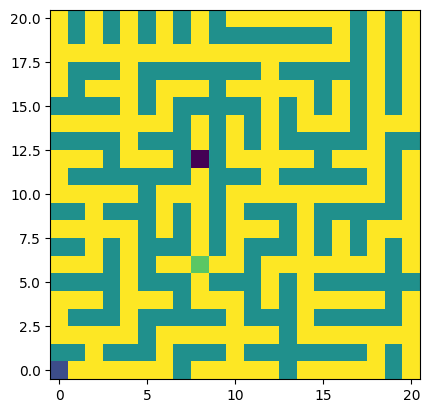

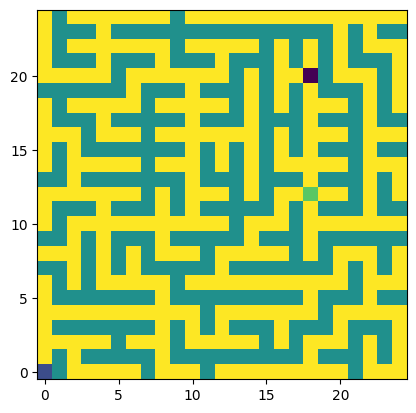

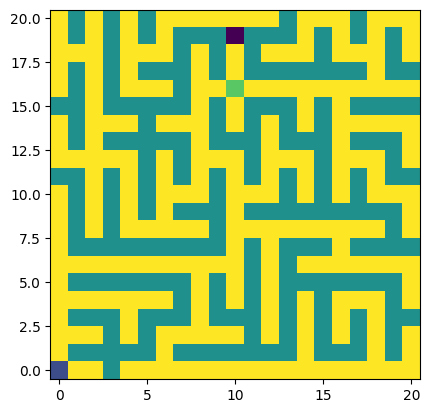

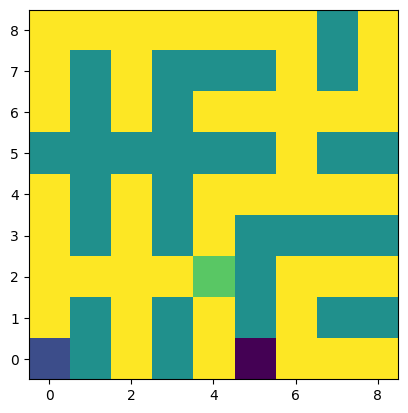

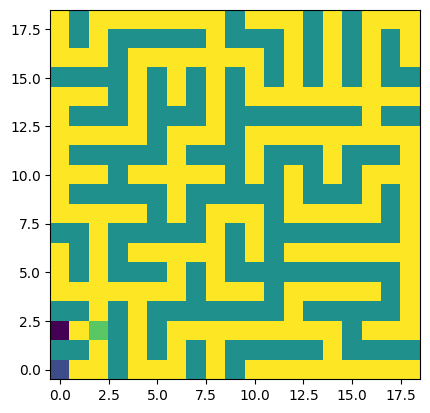

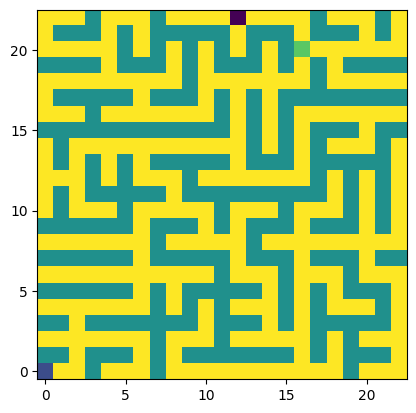

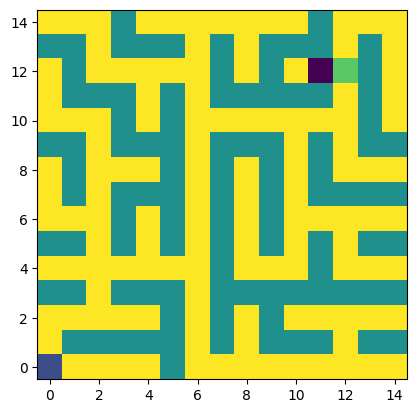

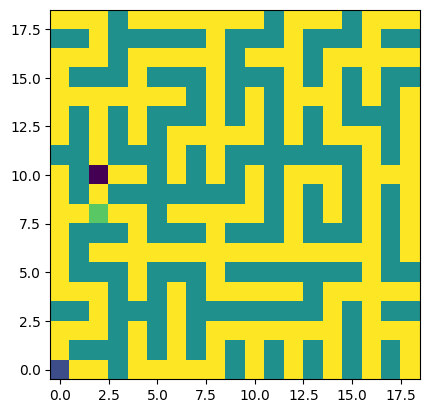

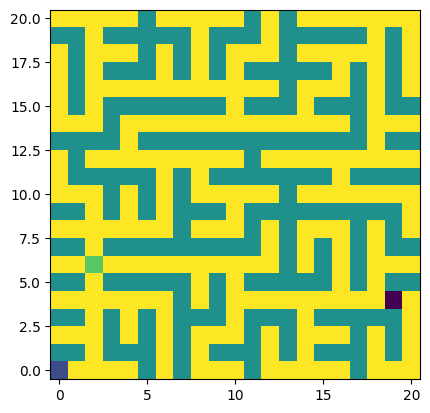

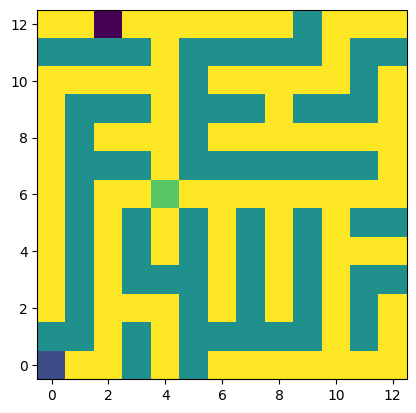

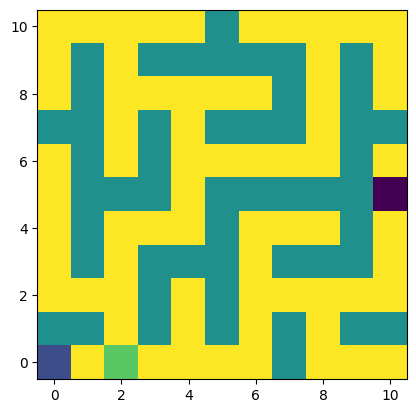

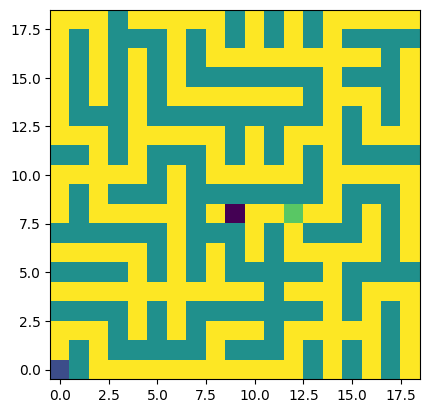

In [6]:
# num is the number of environments to create in the vec env
# num_levels is the number of levels to sample from (0 for infinite, 1 for deterministic)
venv = ProcgenGym3Env(
    num=200, env_name='maze', num_levels=0, start_level=0,
    distribution_mode='hard', num_threads=1, render_mode="rgb_array",
)
venv = maze.wrap_venv(venv)
infos = venv.env.get_info()
states_list = [maze.EnvState(sb) for sb in venv.env.callmethod("get_state")]
grids = [s.inner_grid() for s in states_list]
obs = venv.reset()

# plot all the envs in the vectorized env
for i in range(obs.shape[0]):
    d_sq = decision_square(grids[i])
    if d_sq is not None:
        grids[i][d_sq] = 75

        #plt.imshow(obs[i].transpose(1, 2, 0))
        #plt.imshow(infos[i]['rgb'])
        plt.imshow(grids[i], origin='lower')
        plt.show()

In [7]:
pct = sum(1 for g in grids if decision_square(g) is not None) / len(grids)
print(f'{pct * 100:.2f}% of the mazes have a decision square')

58.00% of the mazes have a decision square
